The Zillow challenge is about predicting the prices of real estate in 2017. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import gc

%matplotlib inline


In [10]:
prop_data = pd.read_csv("properties_2016.csv")
all_columns = prop_data.columns.values
print prop_data.shape
prop_data.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [11]:
train_df = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
train_data = train_df
print train_data.shape
print train_data.head()

(90275, 3)
   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02


## Plotting the logerror

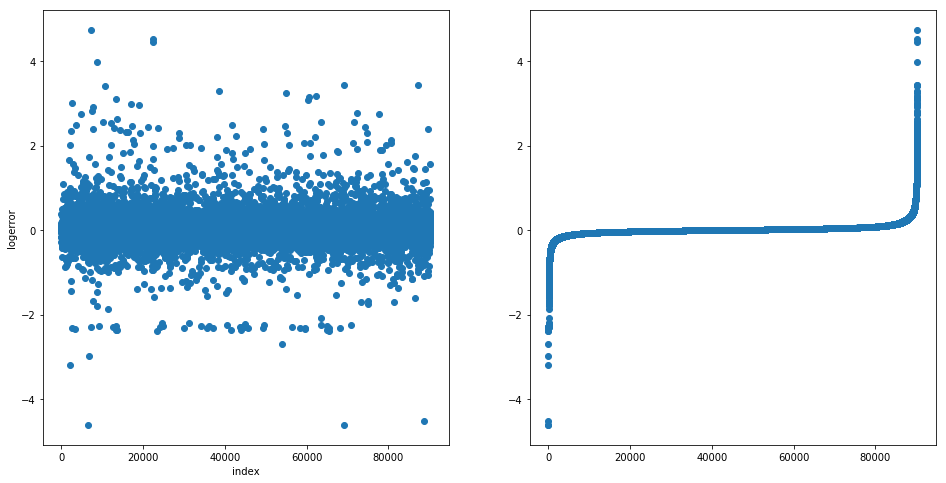

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


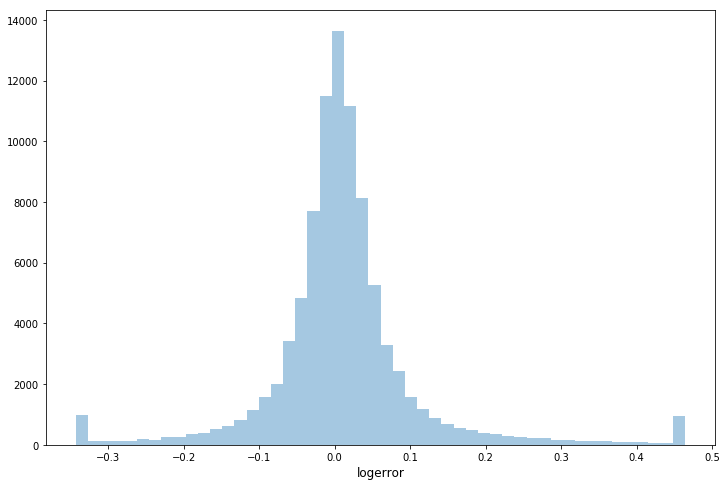

In [12]:
logerror = train_data["logerror"]
hist, bins = np.histogram(logerror, bins=50)
center = (bins[:-1] + bins[1:]) / 2
width = 0.7 * (bins[1]-bins[0])
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.xlabel("index")
plt.ylabel("logerror")
plt.scatter(range(train_data.shape[0]), logerror)
plt.subplot(122)
plt.scatter(range(train_data.shape[0]), np.sort(logerror))
plt.show()
# plt.subplot(133)
ulimit = np.percentile(train_data.logerror.values, 99)
llimit = np.percentile(train_data.logerror.values, 1)
train_data['logerror'].loc[train_data['logerror']>ulimit] = ulimit
train_data['logerror'].loc[train_data['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sb.distplot(train_data.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

del logerror
del hist
del bins

## Plotting the missing value count

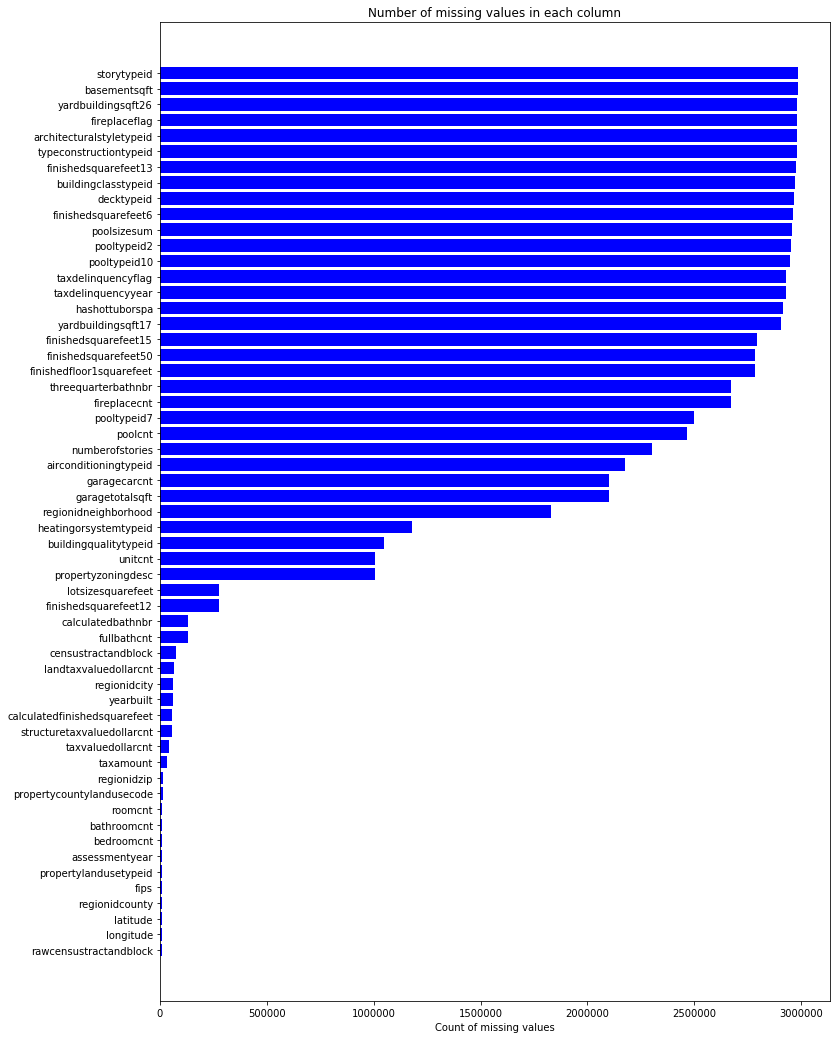

In [13]:
missing_val = prop_data.isnull().sum().reset_index()
missing_val.columns = ['column_name', 'missing_count']
missing_val = missing_val.loc[missing_val['missing_count']>0]
missing_val = missing_val.sort_values(by='missing_count')

ind = np.arange(missing_val.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_val.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_val.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

del ind

## Performing minimal cleaning

In [14]:
missing_val['missing_ratio'] = missing_val["missing_count"]/prop_data.shape[0]
missing_val = missing_val.loc[missing_val["missing_ratio"]>0.995]
missing_val


,column_name,missing_count,missing_ratio
6,buildingclasstypeid,2972588,0.995769
13,finishedsquarefeet13,2977545,0.997430
43,typeconstructiontypeid,2978470,0.997740
2,architecturalstyletypeid,2979156,0.997970
49,fireplaceflag,2980054,0.998270
46,yardbuildingsqft26,2982570,0.999113
3,basementsqft,2983589,0.999455
41,storytypeid,2983593,0.999456


In [15]:
prop_data.drop(missing_val.column_name.values, axis=1, inplace=True)

In [16]:
missing_val_rows = prop_data.isnull().sum(axis=1).reset_index()
missing_val_rows.columns = ["row_index", "null_count"]
missing_val_rows["missing_ratio"] = missing_val_rows["null_count"]/prop_data.shape[1]
missing_val_rows["missing_ratio"]

0          0.66
1          0.64
2          0.54
3          0.48
4          0.50
5          0.48
6          0.60
7          0.52
8          0.64
9          0.50
10         0.50
11         0.66
12         0.64
13         0.64
14         0.64
15         0.64
16         0.62
17         0.52
18         0.52
19         0.42
20         0.48
21         0.50
22         0.46
23         0.46
24         0.48
25         0.62
26         0.46
27         0.48
28         0.40
29         0.42
           ... 
2985187    0.98
2985188    0.98
2985189    0.98
2985190    0.98
2985191    0.98
2985192    0.98
2985193    0.98
2985194    0.98
2985195    0.98
2985196    0.98
2985197    0.98
2985198    0.98
2985199    0.98
2985200    0.98
2985201    0.98
2985202    0.98
2985203    0.98
2985204    0.98
2985205    0.98
2985206    0.98
2985207    0.98
2985208    0.98
2985209    0.98
2985210    0.98
2985211    0.98
2985212    0.98
2985213    0.98
2985214    0.98
2985215    0.98
2985216    0.98
Name: missing_ratio, Len

In [17]:
# rows_to_delete = missing_val_rows.loc[missing_val_rows["missing_ratio"]>0.95]
# rows_to_delete


In [18]:
# prop_data.drop(prop_data.index[rows_to_delete["row_index"]], inplace=True)
prop_data.shape

(2985217, 50)

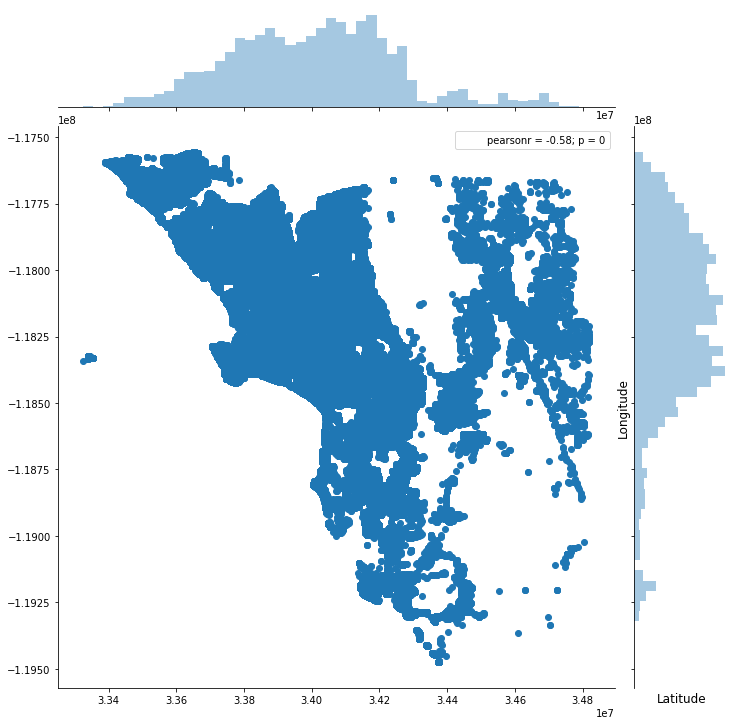

In [19]:
del missing_val
del missing_val_rows
gc.collect()

plt.figure(figsize=(12,12))
sb.jointplot(x=prop_data.latitude.values, y=prop_data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

## Baseline Model

In [20]:
train_data = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
train_data = train_data.merge(prop_data, on='parcelid', how='left')

sample = pd.read_csv("./sample_submission.csv")
sample['parcelid'] = sample['ParcelId']
test_months = [k for k in sample.columns.values if k not in ["parcelid"]]

for c in train_data.columns:
    print c, train_data[c].dtype


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

train_data.fillna(-1, inplace = True)

non_float_cols = ["propertycountylandusecode", "taxdelinquencyflag", "hashottuborspa"]
cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]


X_train = train_data.drop(["parcelid", "logerror", "transactiondate", "propertyzoningdesc"]+non_float_cols, axis=1)
y_train = train_data["logerror"].values

X_test = sample.merge(prop_data, on='parcelid', how='left')
print X_test.shape

X_test = X_test[X_train.columns]
X_test.fillna(-1, inplace=True)
for c in X_test.dtypes[X_test.dtypes == object].index.values:
    X_test[c] = (X_test[c] == True)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

    
from datetime import datetime

for date in test_months:
    sample[date] = y_pred

sample["ParcelId"] = sample["parcelid"]
print sample.head()
sample.drop(["parcelid"], axis=1, inplace=True)

print( "\nWriting results to disk ..." )
sample.to_csv('baseline_sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print( "\nFinished ...")

print("\nWorking on local data")
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))


parcelid int64
logerror float64
transactiondate datetime64[ns]
airconditioningtypeid float64
bathroomcnt float64
bedroomcnt float64
buildingqualitytypeid float64
calculatedbathnbr float64
decktypeid float64
finishedfloor1squarefeet float64
calculatedfinishedsquarefeet float64
finishedsquarefeet12 float64
finishedsquarefeet15 float64
finishedsquarefeet50 float64
finishedsquarefeet6 float64
fips float64
fireplacecnt float64
fullbathcnt float64
garagecarcnt float64
garagetotalsqft float64
hashottuborspa object
heatingorsystemtypeid float64
latitude float64
longitude float64
lotsizesquarefeet float64
poolcnt float64
poolsizesum float64
pooltypeid10 float64
pooltypeid2 float64
pooltypeid7 float64
propertycountylandusecode object
propertylandusetypeid float64
propertyzoningdesc object
rawcensustractandblock float64
regionidcity float64
regionidcounty float64
regionidneighborhood float64
regionidzip float64
roomcnt float64
threequarterbathnbr float64
unitcnt float64
yardbuildingsqft17 float64

In [22]:
missing_val = prop_data.isnull().sum().reset_index()
missing_val.columns = ['column_name', 'missing_count']
missing_val = missing_val.loc[missing_val['missing_count']>0]
missing_val = missing_val.sort_values(by='missing_count')
missing_val['missing_ratio'] = missing_val["missing_count"]/prop_data.shape[0]
missing_val = missing_val.loc[missing_val["missing_ratio"]>0.80]
missing_val

,column_name,missing_count,missing_ratio
23,poolcnt,2467683,0.826634
27,pooltypeid7,2499758,0.837379
14,fireplacecnt,2672580,0.895272
37,threequarterbathnbr,2673586,0.895609
7,finishedfloor1squarefeet,2782500,0.932093
11,finishedsquarefeet50,2782500,0.932093
10,finishedsquarefeet15,2794419,0.936086
39,yardbuildingsqft17,2904862,0.973082
18,hashottuborspa,2916203,0.976881
48,taxdelinquencyyear,2928753,0.981085


In [23]:
prop_data.drop(missing_val.column_name.values, axis=1, inplace=True)
prop_data.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,...,0.0,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN
1,10759547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,...,0.0,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,NaN,0.0,0.0,NaN,NaN,73026.0,NaN,6037.0,NaN,...,0.0,2.0,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN
3,10859147,NaN,0.0,0.0,7.0,NaN,5068.0,NaN,6037.0,NaN,...,0.0,NaN,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN
4,10879947,NaN,0.0,0.0,NaN,NaN,1776.0,NaN,6037.0,NaN,...,0.0,1.0,1947.0,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN


In [24]:
missing_val_rows = prop_data.isnull().sum(axis=1).reset_index()
missing_val_rows.columns = ["row_index", "null_count"]
missing_val_rows["missing_ratio"] = missing_val_rows["null_count"]/prop_data.shape[1]
missing_val_rows["missing_ratio"]

0          0.500000
1          0.470588
2          0.352941
3          0.264706
4          0.294118
5          0.264706
6          0.411765
7          0.323529
8          0.470588
9          0.294118
10         0.294118
11         0.500000
12         0.470588
13         0.470588
14         0.470588
15         0.470588
16         0.441176
17         0.323529
18         0.294118
19         0.147059
20         0.264706
21         0.294118
22         0.294118
23         0.235294
24         0.264706
25         0.441176
26         0.235294
27         0.264706
28         0.117647
29         0.147059
             ...   
2985187    0.970588
2985188    0.970588
2985189    0.970588
2985190    0.970588
2985191    0.970588
2985192    0.970588
2985193    0.970588
2985194    0.970588
2985195    0.970588
2985196    0.970588
2985197    0.970588
2985198    0.970588
2985199    0.970588
2985200    0.970588
2985201    0.970588
2985202    0.970588
2985203    0.970588
2985204    0.970588
2985205    0.970588


In [25]:
print "Saving this modified data to prop_data_mod.csv"

prop_data_new = prop_data
prop_data_new.fillna(-1).to_csv("./prop_data_mod.csv")
prop_data.head()

del sample
del missing_val
del missing_val_rows
del prop_data_new
del train_data
gc.collect()


Saving this modified data to prop_data_mod.csv


363

In [26]:
dtype_df = prop_data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
# dtype_df.groupby("Column Type").aggregate("count").reset_index()


,Count,Column Type
0,parcelid,int64
1,airconditioningtypeid,float64
2,bathroomcnt,float64
3,bedroomcnt,float64
4,buildingqualitytypeid,float64
5,calculatedbathnbr,float64
6,calculatedfinishedsquarefeet,float64
7,finishedsquarefeet12,float64
8,fips,float64
9,fullbathcnt,float64


## Checking the value count for each feature

In [27]:
for column in prop_data:
    print column, "\n",prop_data[column].value_counts(dropna=False), "\n\n\n********"

parcelid 
12584959    1
12755709    1
12751611    1
12753658    1
12747513    1
12749560    1
12776183    1
12778230    1
12772085    1
12774132    1
12767987    1
12770034    1
12763889    1
12729070    1
12722925    1
12724972    1
12718827    1
12720874    1
12714729    1
12743399    1
12745446    1
12757756    1
12761854    1
12741348    1
12759807    1
14016022    1
12820200    1
12427380    1
17066269    1
11446598    1
           ..
10861026    1
10854881    1
10856928    1
10768863    1
10770910    1
10764765    1
10766812    1
10824176    1
10828274    1
10826227    1
10834431    1
12253706    1
12247561    1
12227079    1
12222981    1
12225028    1
12237314    1
12231169    1
12233216    1
10836478    1
10815988    1
10830333    1
10832380    1
10842619    1
10844666    1
10838521    1
10840568    1
10820086    1
10813941    1
12582912    1
Name: parcelid, Length: 2985217, dtype: int64 


********
airconditioningtypeid 
NaN      2173698
 1.0      742364
 13.0      58457
 5.0

NaN            11437
 33984600.0      862
 33708500.0      760
 34056700.0      740
 34171800.0      611
 33766300.0      568
 33785200.0      559
 34048000.0      555
 34169800.0      553
 34058000.0      541
 33665651.0      524
 33856782.0      513
 34056400.0      510
 33771600.0      504
 34150700.0      497
 34136300.0      484
 33699800.0      463
 34410700.0      455
 33770500.0      435
 33869800.0      429
 33958200.0      428
 33867865.0      422
 33825300.0      422
 33623100.0      421
 33825000.0      419
 34063400.0      416
 34041500.0      402
 33697400.0      401
 34150100.0      396
 33771300.0      395
               ...  
 34617640.0        1
 34450526.0        1
 34184778.0        1
 33755881.0        1
 33660013.0        1
 33659394.0        1
 34163307.0        1
 34063374.0        1
 33673100.0        1
 33720520.0        1
 34169801.0        1
 34661556.0        1
 33635653.0        1
 33467813.0        1
 33704082.0        1
 34661754.0        1
 34002774.0  

 3101.0    2009362
 1286.0     741565
 2061.0     222853
NaN          11437
Name: regionidcounty, dtype: int64 


********
regionidneighborhood 
NaN          1828815
 118208.0      32267
 268496.0      23186
 48570.0       21186
 27080.0       18891
 37739.0       18645
 54300.0       17749
 33183.0       16953
 34213.0       16607
 51906.0       15660
 41131.0       15451
 48200.0       14860
 31817.0       14690
 276476.0      14566
 113455.0      14353
 46736.0       14349
 40548.0       13320
 268588.0      12894
 274514.0      12686
 274049.0      12600
 41466.0       11180
 40215.0       10837
 6952.0        10795
 27987.0       10616
 47950.0       10446
 47880.0       10445
 113910.0      10238
 118920.0      10226
 118872.0      10063
 37835.0        9999
              ...   
 219438.0         27
 763079.0         27
 764153.0         27
 273042.0         26
 761214.0         25
 761220.0         23
 762596.0         21
 762176.0         21
 764139.0         20
 761090.0      

NaN          67733
 20980.0      3804
 22414.0      2474
 16275.0      2377
 19149.0      2218
 9.0          2172
 20374.0      2123
 22827.0      2114
 18332.0      2108
 29757.0      2103
 204922.0     1930
 20167.0      1926
 16702.0      1922
 16498.0      1902
 22008.0      1883
 15481.0      1854
 203996.0     1832
 21190.0      1829
 17520.0      1822
 209020.0     1807
 18309.0      1782
 16294.0      1774
 17314.0      1745
 20783.0      1719
 14252.0      1640
 21391.0      1637
 18749.0      1635
 23435.0      1630
 17111.0      1628
 21804.0      1614
             ...  
 409896.0        1
 409898.0        1
 409899.0        1
 409904.0        1
 409906.0        1
 975660.0        1
 409908.0        1
 409913.0        1
 409916.0        1
 975655.0        1
 409918.0        1
 975736.0        1
 409885.0        1
 409883.0        1
 409862.0        1
 975814.0        1
 975811.0        1
 409851.0        1
 975808.0        1
 409854.0        1
 975799.0        1
 6425.0     

## FInding the discarded columns

In [28]:
columns = [
# 'logerror', 
'transactiondate',
'airconditioningtypeid', 'architecturalstyletypeid',
'basementsqft', 'bathroomcnt',
'bedroomcnt', 'buildingqualitytypeid',
'buildingclasstypeid', 'calculatedbathnbr',
'decktypeid', 'threequarterbathnbr',
'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
'finishedsquarefeet6', 'finishedsquarefeet12',
'finishedsquarefeet13', 'finishedsquarefeet15',
'finishedsquarefeet50', 'fips',
'fireplacecnt', 'fireplaceflag',
'fullbathcnt', 'garagecarcnt',
'garagetotalsqft', 'hashottuborspa',
'heatingorsystemtypeid', 'latitude',
'longitude', 'lotsizesquarefeet',
'numberofstories', 'parcelid',
'poolcnt', 'poolsizesum',
'pooltypeid10', 'pooltypeid2',
'pooltypeid7', 'propertycountylandusecode',
'propertylandusetypeid', 'propertyzoningdesc',
'rawcensustractandblock', 'censustractandblock',
'regionidcounty', 'regionidcity',
'regionidzip', 'regionidneighborhood',
'roomcnt', 'storytypeid',
'typeconstructiontypeid', 'unitcnt',
'yardbuildingsqft17', 'yardbuildingsqft26',
'yearbuilt','taxvaluedollarcnt',
'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
'taxamount', 'assessmentyear', 
'taxdelinquencyflag', 'taxdelinquencyyear'
]

for c in columns:
    if c not in prop_data.columns.values:
        print c


transactiondate
architecturalstyletypeid
basementsqft
buildingclasstypeid
decktypeid
threequarterbathnbr
finishedfloor1squarefeet
finishedsquarefeet6
finishedsquarefeet13
finishedsquarefeet15
finishedsquarefeet50
fireplacecnt
fireplaceflag
hashottuborspa
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
storytypeid
typeconstructiontypeid
yardbuildingsqft17
yardbuildingsqft26
taxdelinquencyflag
taxdelinquencyyear


## Finding the correlation among the features

/home/jay/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jay/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


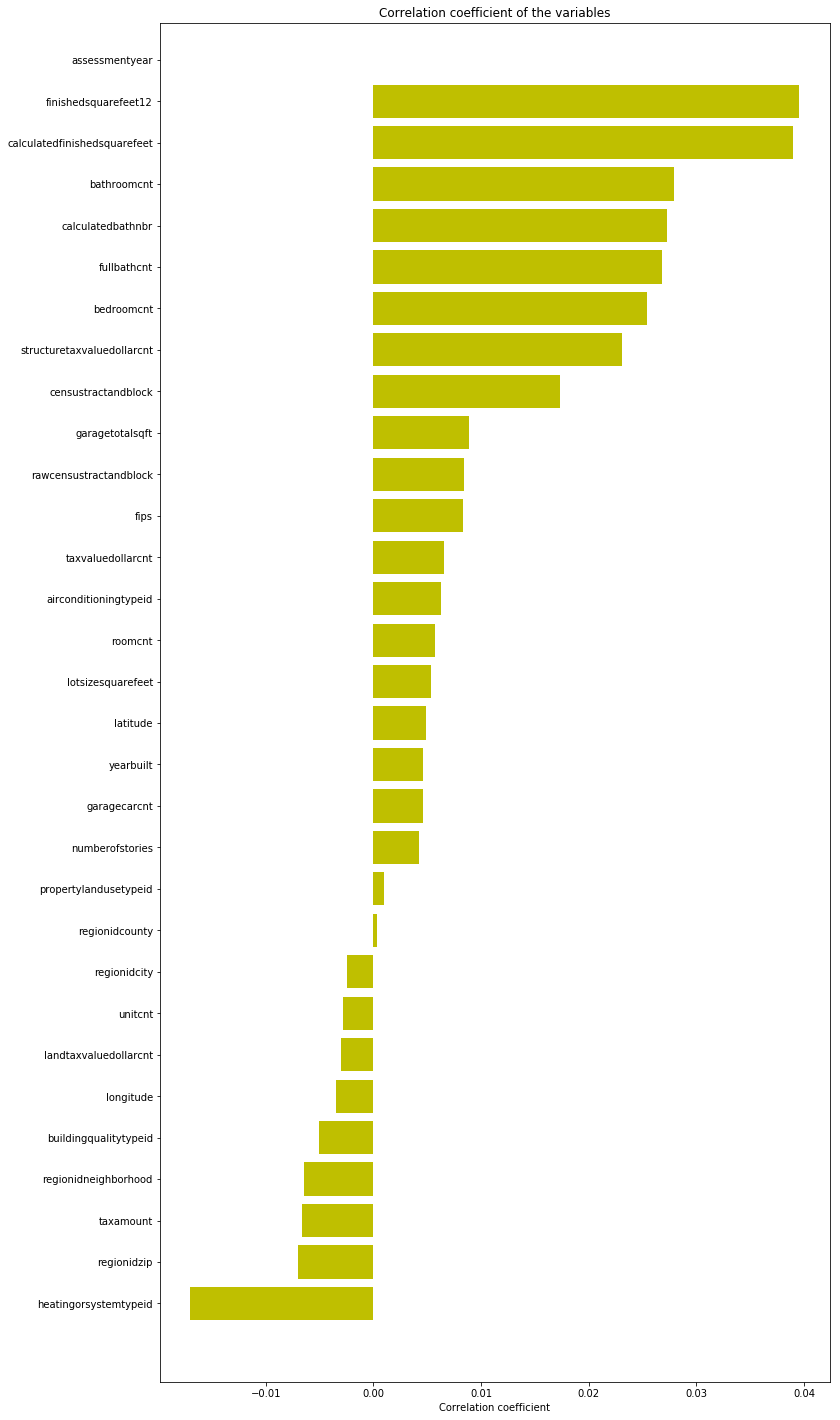

In [31]:
# mean_values = prop_data.mean(axis=0)
# prop_data_new = prop_data.fillna(-1)
train_data = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
train_data = train_data.merge(prop_data, on='parcelid', how='left')
train_data.fillna(-1, inplace=True)

x_cols = [col for col in train_data.columns if col not in ['logerror'] if train_data[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_data[col].values, train_data.logerror.values)[0,1])
corr_data = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_data = corr_data.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(12,25))
rects = ax.barh(ind, np.array(corr_data.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_data.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()


In [32]:
corr_data_sel = corr_data.loc[(corr_data['corr_values']>0.02) | (corr_data['corr_values'] < -0.01)]
corr_data_sel


,col_labels,corr_values
11,heatingorsystemtypeid,-0.017002
25,structuretaxvaluedollarcnt,0.023141
2,bedroomcnt,0.025467
8,fullbathcnt,0.026777
4,calculatedbathnbr,0.027303
1,bathroomcnt,0.027889
5,calculatedfinishedsquarefeet,0.039011
6,finishedsquarefeet12,0.039555


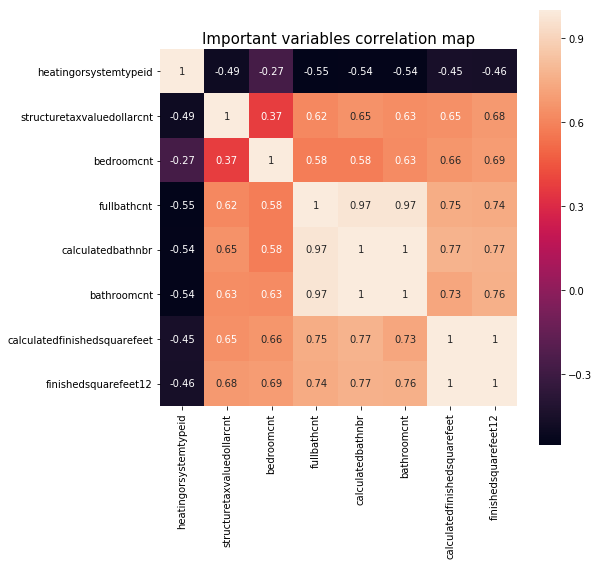

In [33]:
cols_to_use = corr_data_sel.col_labels.tolist()

temp_df = prop_data[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., annot=True, square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()


In [34]:
print "saving clean data to prop_data_clean.csv"
prop_data.to_csv("./prop_data_clean.csv")
prop_data.head()
del prop_data
gc.collect()

saving clean data to prop_data_clean.csv


21312

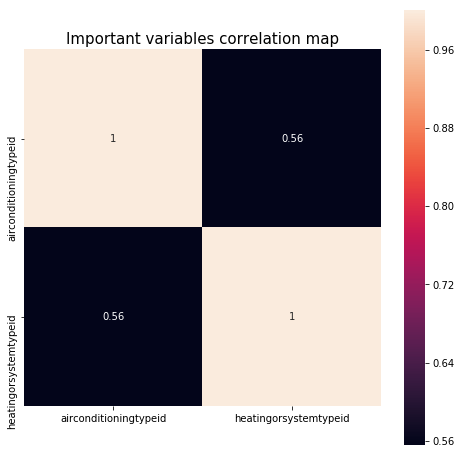

In [36]:
prop_data = pd.read_csv("./prop_data_clean.csv", index_col=0)
prop_data_new = prop_data.fillna(-1)

# Now let us look at the correlation coefficient of each of these variables #
cols_to_use = [col for col in prop_data_new.columns if col in ['airconditioningtypeid', 'heatingorsystemtypeid']]

# cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = prop_data[cols_to_use]
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., square=True, annot=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()


In [37]:
prop_data.shape

(2985217, 34)

In [40]:
train_data = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
train_data = train_data.merge(prop_data, on='parcelid', how='left')

sample = pd.read_csv("./sample_submission.csv")
sample['parcelid'] = sample['ParcelId']
test_months = [k for k in sample.columns.values if k not in ["parcelid"]]

for c in train_data.columns:
    print c, train_data[c].dtype


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

train_data.fillna(-1, inplace = True)

non_float_cols = ["propertycountylandusecode"]#,"propertyzoningdesc", "taxdelinquencyflag", "hashottuborspa"]
cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]


X_train = train_data.drop(["parcelid", "logerror", "transactiondate", "propertyzoningdesc"]+non_float_cols, axis=1)
y_train = train_data["logerror"].values

X_test = sample.merge(prop_data, on='parcelid', how='left')
print X_test.shape

X_test = X_test[X_train.columns]
X_test.fillna(-1, inplace=True)
for c in X_test.dtypes[X_test.dtypes == object].index.values:
    X_test[c] = (X_test[c] == True)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

    
from datetime import datetime

for date in test_months:
    sample[date] = y_pred

sample["ParcelId"] = sample["parcelid"]
print sample.head()
sample.drop(["parcelid"], axis=1, inplace=True)

print( "\nWriting results to disk ..." )
sample.to_csv('baseline_sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print( "\nFinished ...")

print("\nWorking on local data")
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))


parcelid int64
logerror float64
transactiondate datetime64[ns]
airconditioningtypeid float64
bathroomcnt float64
bedroomcnt float64
buildingqualitytypeid float64
calculatedbathnbr float64
calculatedfinishedsquarefeet float64
finishedsquarefeet12 float64
fips float64
fullbathcnt float64
garagecarcnt float64
garagetotalsqft float64
heatingorsystemtypeid float64
latitude float64
longitude float64
lotsizesquarefeet float64
propertycountylandusecode object
propertylandusetypeid float64
propertyzoningdesc object
rawcensustractandblock float64
regionidcity float64
regionidcounty float64
regionidneighborhood float64
regionidzip float64
roomcnt float64
unitcnt float64
yearbuilt float64
numberofstories float64
structuretaxvaluedollarcnt float64
taxvaluedollarcnt float64
assessmentyear float64
landtaxvaluedollarcnt float64
taxamount float64
censustractandblock float64
(2985217, 41)
   ParcelId    201610    201611    201612    201710    201711    201712  \
0  10754147 -0.037024 -0.037024 -0.037024

In [41]:
prop_data[["airconditioningtypeid", "heatingorsystemtypeid"]]


,airconditioningtypeid,heatingorsystemtypeid
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


## Imputing values

In [42]:
#imputing airconditioningtypeid, making some NaN to 1.0 where heatingorsystemtypeid == 2

prop_data.loc[(prop_data["heatingorsystemtypeid"]==2.0) & (pd.isnull(prop_data["airconditioningtypeid"])), "airconditioningtypeid"] = 1.0

prop_data["airconditioningtypeid"].fillna(-1, inplace=True)
print prop_data["airconditioningtypeid"].value_counts()

prop_data[["airconditioningtypeid", "heatingorsystemtypeid"]].head()

-1.0     1723978
 1.0     1192084
 13.0      58457
 5.0        8795
 11.0       1818
 12.0         59
 9.0          19
 3.0           7
Name: airconditioningtypeid, dtype: int64


,airconditioningtypeid,heatingorsystemtypeid
0,-1.0,NaN
1,-1.0,NaN
2,-1.0,NaN
3,-1.0,NaN
4,-1.0,NaN


In [43]:
duplicate_or_not_useful_cols = pd.Series(['calculatedbathnbr', 'assessmentyear', 'fullbathcnt', 
                    'regionidneighborhood', 'propertyzoningdesc', 'censustractandblock'])#,'finishedsquarefeet12'])
prop_data.drop(duplicate_or_not_useful_cols, axis=1, inplace=True)


In [44]:
prop_data["buildingqualitytypeid"].fillna(prop_data["buildingqualitytypeid"].mean(), inplace=True)
prop_data["calculatedfinishedsquarefeet"].interpolate(inplace=True)
prop_data["heatingorsystemtypeid"].fillna(-1, inplace=True)
prop_data["lotsizesquarefeet"].fillna(prop_data["lotsizesquarefeet"].median(), inplace=True)
prop_data.drop(["numberofstories"], axis=1, inplace=True)
#removing propertycountylandusecode because it is not in interpretable format
prop_data.drop(["propertycountylandusecode"], axis=1, inplace=True)
prop_data["regionidcity"].interpolate(inplace=True)
prop_data["regionidzip"].interpolate(inplace=True)
prop_data["yearbuilt"].fillna(prop_data["yearbuilt"].mean(), inplace=True)

#impute structuretaxvaluedollarcnt, taxvaluedollarcnt, landtaxvaluedollarcnt, taxamount by interpolation
cols_to_interpolate = ["structuretaxvaluedollarcnt", "taxvaluedollarcnt", "landtaxvaluedollarcnt", "taxamount"]
for c in cols_to_interpolate:
    prop_data[c].interpolate(inplace=True)


In [45]:
#imputing garagecarcnt on basis of propertylandusetypeid
#All the residential places have 1 or 2 garagecarcnt, hence using random filling for those values.

prop_data.loc[(prop_data["propertylandusetypeid"]==261) & (pd.isnull(prop_data["garagecarcnt"])), "garagecarcnt"] = np.random.randint(1,3)
prop_data.loc[(prop_data["propertylandusetypeid"]==266) & (pd.isnull(prop_data["garagecarcnt"])), "garagecarcnt"] = np.random.randint(1,3)

prop_data["garagecarcnt"].fillna(-1, inplace=True)

prop_data["garagecarcnt"].value_counts(dropna=False)


 1.0     1944774
 2.0      660462
-1.0      334755
 3.0       19634
 0.0       14005
 4.0        8495
 5.0        1705
 6.0         575
 7.0         266
 8.0         181
 9.0         127
 10.0         78
 11.0         62
 12.0         41
 13.0         16
 14.0         14
 15.0          9
 17.0          4
 16.0          3
 19.0          3
 21.0          2
 20.0          2
 24.0          2
 25.0          1
 18.0          1
Name: garagecarcnt, dtype: int64

In [46]:
#imputing garagetotalsqft using the garagecarcnt

prop_data.loc[(prop_data["garagecarcnt"]==-1) & (pd.isnull(prop_data["garagetotalsqft"]) | (prop_data["garagetotalsqft"] == 0)), "garagetotalsqft"] = -1
prop_data.loc[(prop_data["garagecarcnt"]==1) & (pd.isnull(prop_data["garagetotalsqft"]) | (prop_data["garagetotalsqft"] == 0)), "garagetotalsqft"] = np.random.randint(180, 400)
prop_data.loc[(prop_data["garagecarcnt"]==2) & (pd.isnull(prop_data["garagetotalsqft"]) | (prop_data["garagetotalsqft"] == 0)), "garagetotalsqft"] = np.random.randint(400, 720)
prop_data.loc[(prop_data["garagecarcnt"]==3) & (pd.isnull(prop_data["garagetotalsqft"]) | (prop_data["garagetotalsqft"] == 0)), "garagetotalsqft"] = np.random.randint(720, 880)
prop_data.loc[(prop_data["garagecarcnt"]==4) & (pd.isnull(prop_data["garagetotalsqft"]) | (prop_data["garagetotalsqft"] == 0)), "garagetotalsqft"] = np.random.randint(880, 1200)

prop_data["garagetotalsqft"].interpolate(inplace=True)

prop_data["garagetotalsqft"].value_counts(dropna=False)


 374.0     1854222
-1.0        334755
 537.0       95712
 400.0       33443
 360.0       29703
 441.0       26753
 462.0       25476
 460.0       23787
 440.0       22717
 420.0       20099
 483.0       17219
 0.0         14011
 480.0       12469
 437.0        9605
 430.0        8882
 456.0        8621
 504.0        8453
 451.0        8112
 484.0        5511
 396.0        5221
 471.0        4822
 380.0        4366
 472.0        4316
 600.0        3924
 450.0        3880
 560.0        3725
 506.0        3660
 630.0        3592
 418.0        3537
 410.0        3516
            ...   
 2174.0          1
 2141.0          1
 2188.0          1
 2192.0          1
 2193.0          1
 2194.0          1
 2196.0          1
 2203.0          1
 2204.0          1
 2150.0          1
 2137.0          1
 2070.0          1
 2095.0          1
 2077.0          1
 2080.0          1
 2084.0          1
 2087.0          1
 2088.0          1
 2090.0          1
 2093.0          1
 2101.0          1
 2129.0     

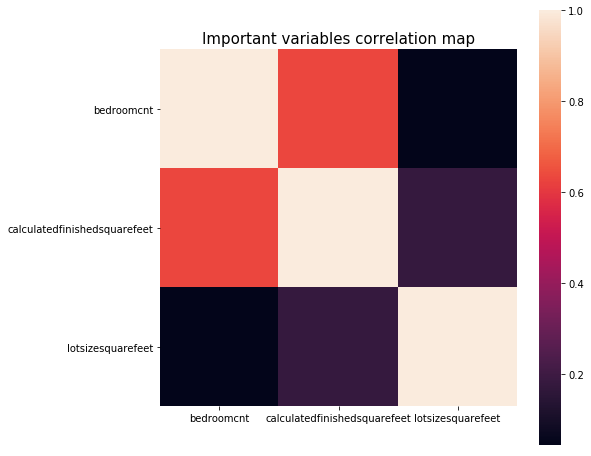

In [47]:
cols_to_use = [col for col in prop_data_new.columns if col in ['calculatedfinishedsquarefeet', 'bedroomcnt', 'lotsizesquarefeet']]

# cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = prop_data[cols_to_use]
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()


In [48]:
for column in prop_data:
    print column, "\n",prop_data[column].value_counts(dropna=False), "\n\n\n********"


parcelid 
12584959    1
12755709    1
12751611    1
12753658    1
12747513    1
12749560    1
12776183    1
12778230    1
12772085    1
12774132    1
12767987    1
12770034    1
12763889    1
12729070    1
12722925    1
12724972    1
12718827    1
12720874    1
12714729    1
12743399    1
12745446    1
12757756    1
12761854    1
12741348    1
12759807    1
14016022    1
12820200    1
12427380    1
17066269    1
11446598    1
           ..
10861026    1
10854881    1
10856928    1
10768863    1
10770910    1
10764765    1
10766812    1
10824176    1
10828274    1
10826227    1
10834431    1
12253706    1
12247561    1
12227079    1
12222981    1
12225028    1
12237314    1
12231169    1
12233216    1
10836478    1
10815988    1
10830333    1
10832380    1
10842619    1
10844666    1
10838521    1
10840568    1
10820086    1
10813941    1
12582912    1
Name: parcelid, Length: 2985217, dtype: int64 


********
airconditioningtypeid 
-1.0     1723978
 1.0     1192084
 13.0      58457
 5.0

NaN             11437
-118390000.0     1718
-118438000.0     1585
-118389000.0     1568
-118252000.0     1402
-118432000.0     1371
-118433000.0     1339
-118445000.0     1319
-118435000.0     1290
-118467000.0     1266
-118463000.0     1255
-118436000.0     1193
-118446000.0     1192
-118378000.0     1187
-118263000.0     1169
-118377000.0     1138
-118450000.0     1112
-118188000.0     1107
-118466000.0     1091
-118437000.0     1078
-118186000.0     1063
-118439000.0     1048
-118464000.0     1048
-118374000.0     1031
-118383000.0     1008
-118443000.0     1007
-118130000.0     1003
-118427000.0      988
-118308000.0      966
-118451000.0      965
                ...  
-118380149.0        1
-117806468.0        1
-119076098.0        1
-117808371.0        1
-117835450.0        1
-117646260.0        1
-118386580.0        1
-117618961.0        1
-118597732.0        1
-118247077.0        1
-118405851.0        1
-118528646.0        1
-119034196.0        1
-118170439.0        1
-118770798

366172.0     11456
100000.0      1880
102461.0      1578
104510.0      1513
200000.0      1419
107401.0      1411
101998.0      1388
150000.0      1378
106600.0      1316
90000.0       1289
203996.0      1246
140000.0      1234
120000.0      1178
110000.0      1172
80000.0       1127
95000.0       1083
130000.0      1082
204922.0      1080
75000.0       1071
125000.0      1058
92000.0       1044
94000.0       1044
105000.0      1039
115000.0      1030
84000.0       1020
160000.0      1002
96000.0       1001
91000.0        994
89000.0        990
87000.0        990
             ...  
388429.0         1
388475.0         1
388473.0         1
388468.0         1
388462.0         1
388459.0         1
388456.0         1
388453.0         1
388446.0         1
388444.0         1
388440.0         1
388437.0         1
388435.0         1
388431.0         1
388428.0         1
388386.0         1
388417.0         1
1266685.0        1
388407.0         1
388405.0         1
388403.0         1
388402.0    

In [49]:
#imputing unitcnt using propertylandusetypeid

prop_data.loc[(prop_data["garagecarcnt"]==4) & (pd.isnull(prop_data["unitcnt"])), "unitcnt"] = np.random.randint(880, 1200)
prop_data["unitcnt"].fillna(1, inplace=True)
prop_data["unitcnt"].value_counts(dropna=False)


1.0       2779297
2.0        115652
4.0         39877
3.0         39830
1194.0       8481
5.0           588
6.0           363
8.0           178
7.0           167
10.0           97
9.0            91
12.0           52
11.0           47
16.0           35
13.0           35
14.0           32
24.0           28
20.0           20
18.0           18
15.0           17
32.0           13
17.0           12
22.0           12
27.0           11
19.0            9
30.0            9
28.0            8
23.0            8
26.0            8
21.0            7
           ...   
78.0            1
102.0           1
144.0           1
83.0            1
85.0            1
88.0            1
91.0            1
93.0            1
96.0            1
98.0            1
68.0            1
66.0            1
65.0            1
256.0           1
143.0           1
138.0           1
134.0           1
132.0           1
131.0           1
41.0            1
125.0           1
120.0           1
118.0           1
114.0           1
113.0     

In [61]:
prop_data.isnull().sum()

parcelid                            0
airconditioningtypeid               0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
fips                                0
garagecarcnt                        0
garagetotalsqft                     0
heatingorsystemtypeid               0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                        0
regionidcounty                      0
regionidzip                         0
roomcnt                             0
unitcnt                             0
yearbuilt                           0
structuretaxvaluedollarcnt          0
taxvaluedollarcnt                   0
landtaxvaluedollarcnt               0
taxamount                           0
age         

In [51]:
prop_data.fillna(-1, inplace=True)
prop_data.to_csv("./prop_data_clean_2.csv")

del prop_data
gc.collect()


7473

## Creating New features

In [52]:
print "creating new features"
prop_data = pd.read_csv("./prop_data_clean_2.csv", index_col=0)

prop_data['age'] = 2017 - prop_data['yearbuilt']

#proportion of living area
prop_data['N-LivingAreaProp'] = prop_data['calculatedfinishedsquarefeet']/prop_data['lotsizesquarefeet']

#Ratio of the built structure value to land area
prop_data['N-ValueProp'] = prop_data['structuretaxvaluedollarcnt']/prop_data['landtaxvaluedollarcnt']

#Ratio of tax of property over parcel
prop_data['N-ValueRatio'] = prop_data['taxvaluedollarcnt']/prop_data['taxamount']


#Average structuretaxvaluedollarcnt by city
group = prop_data.groupby('regionidcity')['structuretaxvaluedollarcnt'].aggregate('mean').to_dict()
prop_data['N-Avg-structuretaxvaluedollarcnt'] = prop_data['regionidcity'].map(group)

#Deviation away from average
prop_data['N-Dev-structuretaxvaluedollarcnt'] = abs((prop_data['structuretaxvaluedollarcnt'] - 
                        prop_data['N-Avg-structuretaxvaluedollarcnt']))/prop_data['N-Avg-structuretaxvaluedollarcnt']

#Number of properties in the zip
zip_count = prop_data['regionidzip'].value_counts().to_dict()
prop_data['N-zip_count'] = prop_data['regionidzip'].map(zip_count)

#Number of properties in the city
city_count = prop_data['regionidcity'].value_counts().to_dict()
prop_data['N-city_count'] = prop_data['regionidcity'].map(city_count)

#Number of properties in the city
region_count = prop_data['regionidcounty'].value_counts().to_dict()
prop_data['N-county_count'] = prop_data['regionidcounty'].map(region_count)

prop_data.to_csv("./prop_data_with_new_features.csv")


creating new features


## Plotting Some interesting bar chart

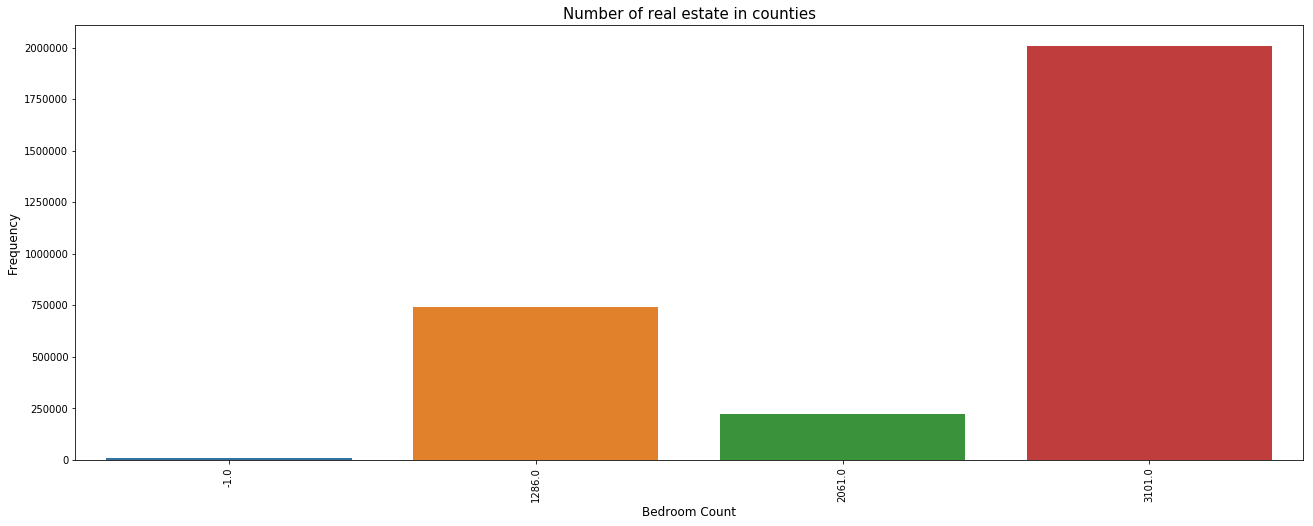

In [53]:
plt.figure(figsize=(22,8))
sb.countplot(x="regionidcounty", data=prop_data)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number of real estate in counties", fontsize=15)
plt.show()


In [62]:

## Merging the train and prop data
print "Merging the train and prop data" 

train_data = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])

train_data = pd.merge(train_data, prop_data, on='parcelid', how='left')
train_data.head()


Merging the train and prop data


,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxamount,age,N-LivingAreaProp,N-ValueProp,N-ValueRatio,N-Avg-structuretaxvaluedollarcnt,N-Dev-structuretaxvaluedollarcnt,N-zip_count,N-city_count,N-county_count
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.000000,1684.0,1684.0,6037.0,...,6735.88,58.0,0.223698,0.517042,53.470371,183929.377014,0.332603,14719,673563,2009362
1,14366692,-0.1684,2016-01-01,-1.0,3.5,4.0,5.784787,2263.0,2263.0,6059.0,...,10153.02,3.0,0.621191,1.449185,57.670427,151746.492714,1.283137,17685,22441,741565
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.000000,2217.0,2217.0,6037.0,...,11484.48,77.0,0.194082,1.070486,10.440699,179879.904106,0.655359,4422,34691,2009362
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.000000,839.0,839.0,6037.0,...,3048.74,30.0,0.011840,2.337968,80.321707,183929.377014,0.067479,7293,673563,2009362
4,14432541,-0.0050,2016-01-02,-1.0,2.5,4.0,5.784787,2283.0,2283.0,6059.0,...,5488.96,36.0,0.380500,0.639957,79.168185,221227.736386,0.233487,9877,9751,741565


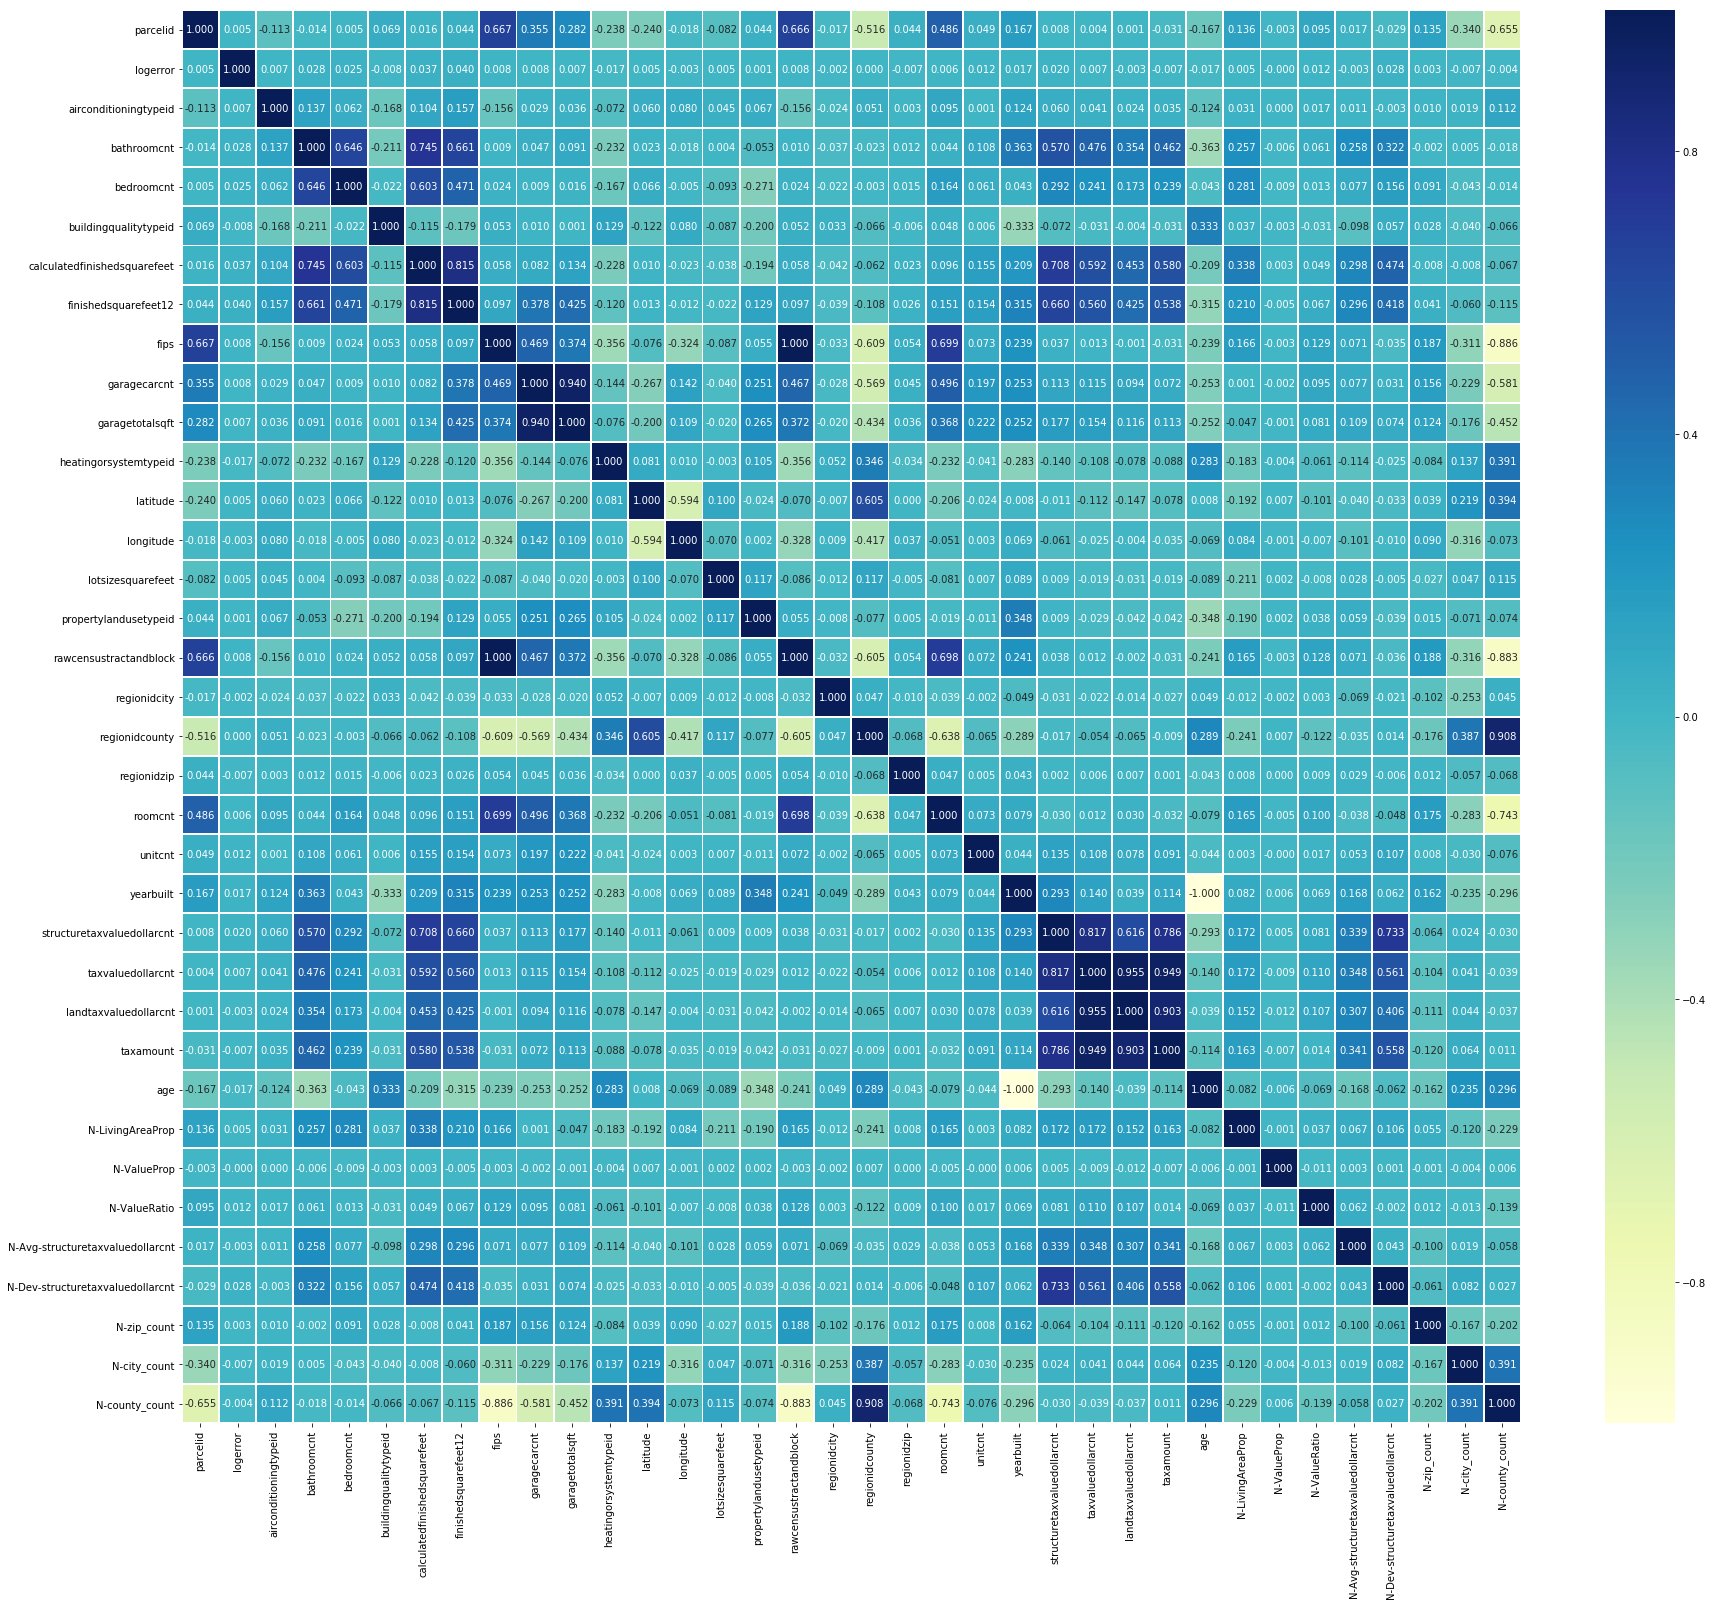

In [63]:
plt.figure(figsize=(30,26))
sb.set_context(font_scale=2.5)
corr_fig = sb.heatmap(train_data.corr("pearson"), cmap="YlGnBu", annot=True, fmt=".3f", linewidths=1.0)
corr_fig = corr_fig.get_figure()
corr_fig.savefig("./correlation_plot_1.png")

### Analysing the above Heatmap

Here we can observe that the tax related variables are highly correlated, which means it is redundant to use all of these for further analysis
Since, 'taxamount' is described as 'The total property tax assessed for that assessment year' it seem like a good option to keep and to discard the other tax variables.

There 3 more pairs of variables that are highly correlated and do not contribute to adding more information.
These pairs are :
1. fips / rawcensustractandblock
2. structuretaxvaluedollarcnt/ landtaxvaluedollarcnt/ taxvaluedollarcnt
3. garagecarcnt / garagetotalsqft

After carefully analysing the data
I decided to drop, rawcensustractandblock, structuretaxvaluedollarcnt, landtaxvaluedollarcnt, garagecarcnt

In [64]:
train_data.drop(["rawcensustractandblock", "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt", "taxvaluedollarcnt", "garagecarcnt"],axis=1, inplace=True)#, "calculatedfinishedsquarefeet"], axis=1, inplace=True)


### Lets plot the correlation again

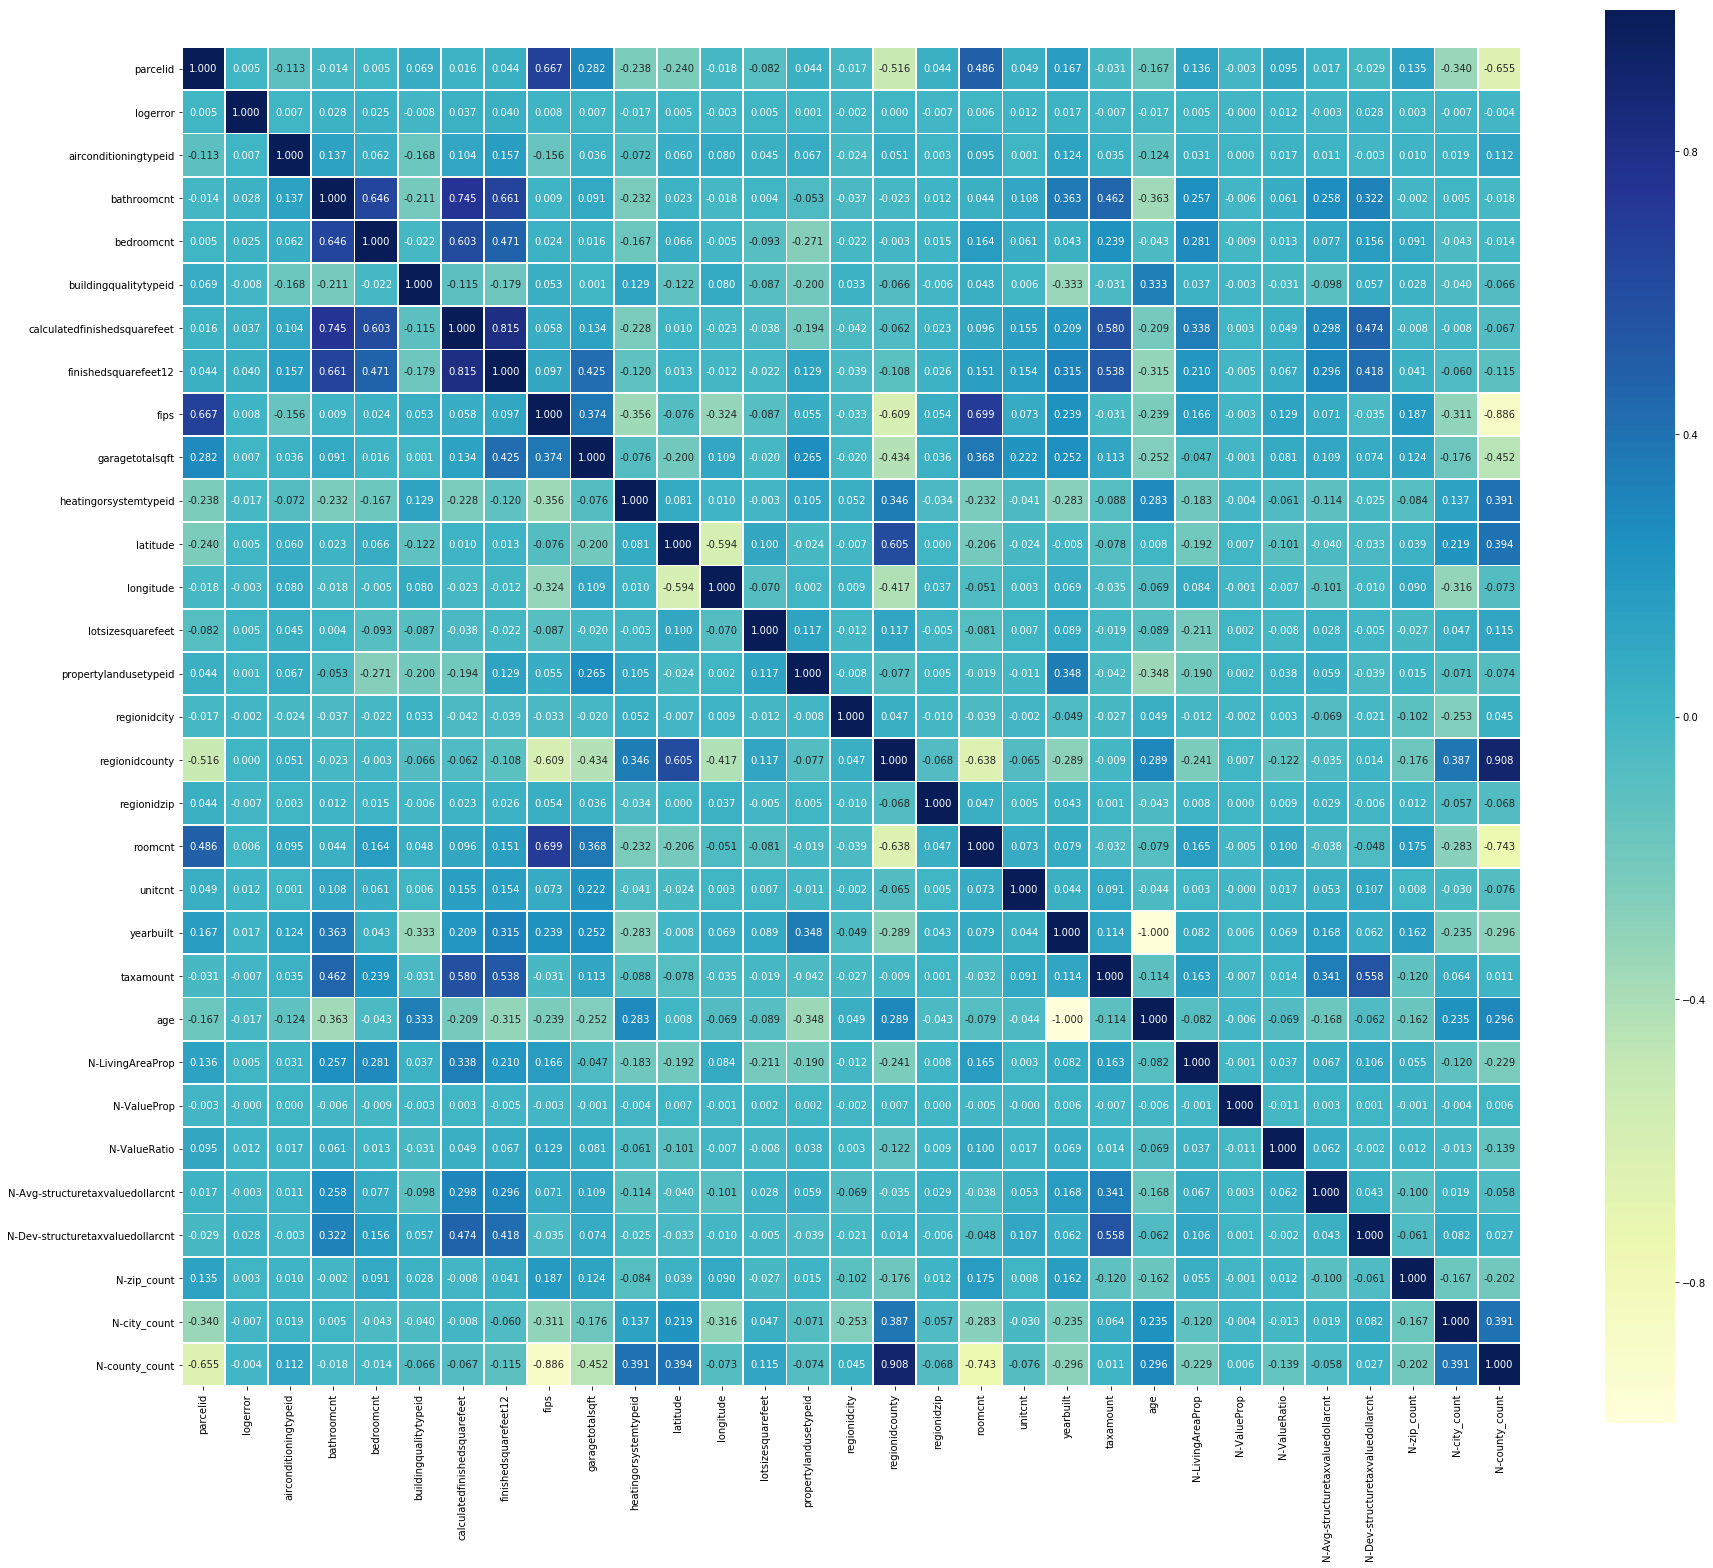

In [65]:
plt.figure(figsize=(30,26))
sb.set_context(font_scale=2.5)
corr_fig = sb.heatmap(train_data.corr("pearson"), cmap="YlGnBu", square=True, annot=True, fmt=".3f", linewidths=1.0)
corr_fig = corr_fig.get_figure()
corr_fig.savefig("./correlation_plot_2.png")

## Linear regression on the modified data

In [67]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split

sample = pd.read_csv("./sample_submission.csv")
sample['parcelid'] = sample['ParcelId']
test_months = [k for k in sample.columns.values if k not in ["parcelid", "ParcelId"]]
train_data.fillna(train_data.mean(), inplace=True)

cat_cols = []
# cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]

X_train = train_data.drop(["parcelid", "logerror", "transactiondate"]+cat_cols, axis=1)
y_train = train_data["logerror"].values
# X_test = pd.merge(sample, prop_data, on='parcelid', how='left')
# X_test = X_test[X_train.columns]
# print "X_test shape"
# print X_test.shape

# # Create linear regression object
# regr = linear_model.LinearRegression(normalize=True)
# # Train the model using the training sets
# regr.fit(X_train, y_train)
# # Make predictions using the testing set
# y_pred = regr.predict(X_test)
    
# from datetime import datetime

# for date in test_months:
#     sample[date] = y_pred

# sample["ParcelId"] = sample["parcelid"]
# sample.drop(["parcelid"], axis=1, inplace=True)

# print( "\nWriting results to disk ..." )
# sample.to_csv('LR_sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

# print( "\nFinished ...")


X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# print y_pred.shape

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))

del train_data
del sample
del X_train
del y_train
del X_test
gc.collect()



NameError: name 'train_data' is not defined

## Let's see the feature importance

X train cols
['airconditioningtypeid' 'bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'fips'
 'garagecarcnt' 'garagetotalsqft' 'heatingorsystemtypeid' 'latitude'
 'longitude' 'lotsizesquarefeet' 'propertylandusetypeid'
 'rawcensustractandblock' 'regionidcity' 'regionidcounty' 'regionidzip'
 'roomcnt' 'unitcnt' 'yearbuilt' 'structuretaxvaluedollarcnt'
 'taxvaluedollarcnt' 'landtaxvaluedollarcnt' 'taxamount' 'age'
 'N-LivingAreaProp' 'N-ValueProp' 'N-ValueRatio'
 'N-Avg-structuretaxvaluedollarcnt' 'N-Dev-structuretaxvaluedollarcnt'
 'N-zip_count' 'N-city_count' 'N-county_count']
X_test shape
(2985217, 34)

Writing results to disk ...

Finished ...


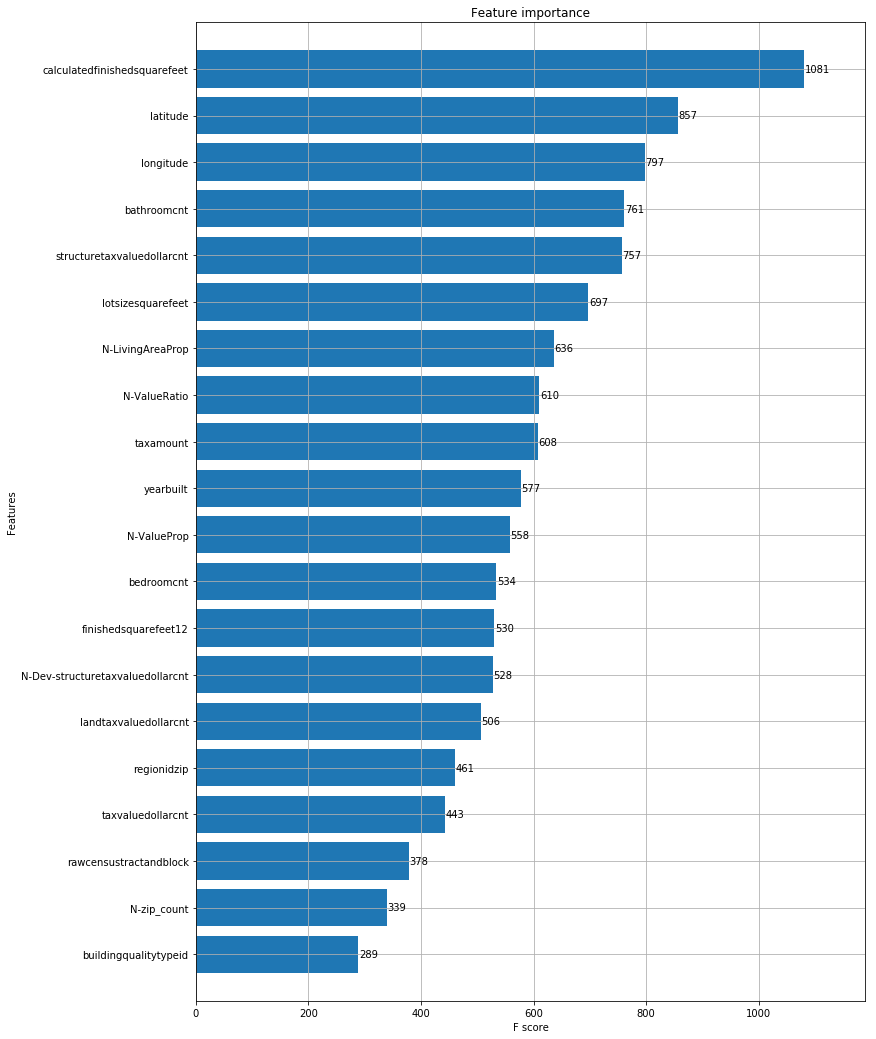

X train cols
['airconditioningtypeid' 'bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'fips'
 'garagecarcnt' 'garagetotalsqft' 'heatingorsystemtypeid' 'latitude'
 'longitude' 'lotsizesquarefeet' 'propertylandusetypeid'
 'rawcensustractandblock' 'regionidcity' 'regionidcounty' 'regionidzip'
 'roomcnt' 'unitcnt' 'yearbuilt' 'structuretaxvaluedollarcnt'
 'taxvaluedollarcnt' 'landtaxvaluedollarcnt' 'taxamount' 'age'
 'N-LivingAreaProp' 'N-ValueProp' 'N-ValueRatio'
 'N-Avg-structuretaxvaluedollarcnt' 'N-Dev-structuretaxvaluedollarcnt'
 'N-zip_count' 'N-city_count' 'N-county_count']
X_test shape
(18055, 34)
Mean absolute error:  0.069291
Mean squared error: 0.025694


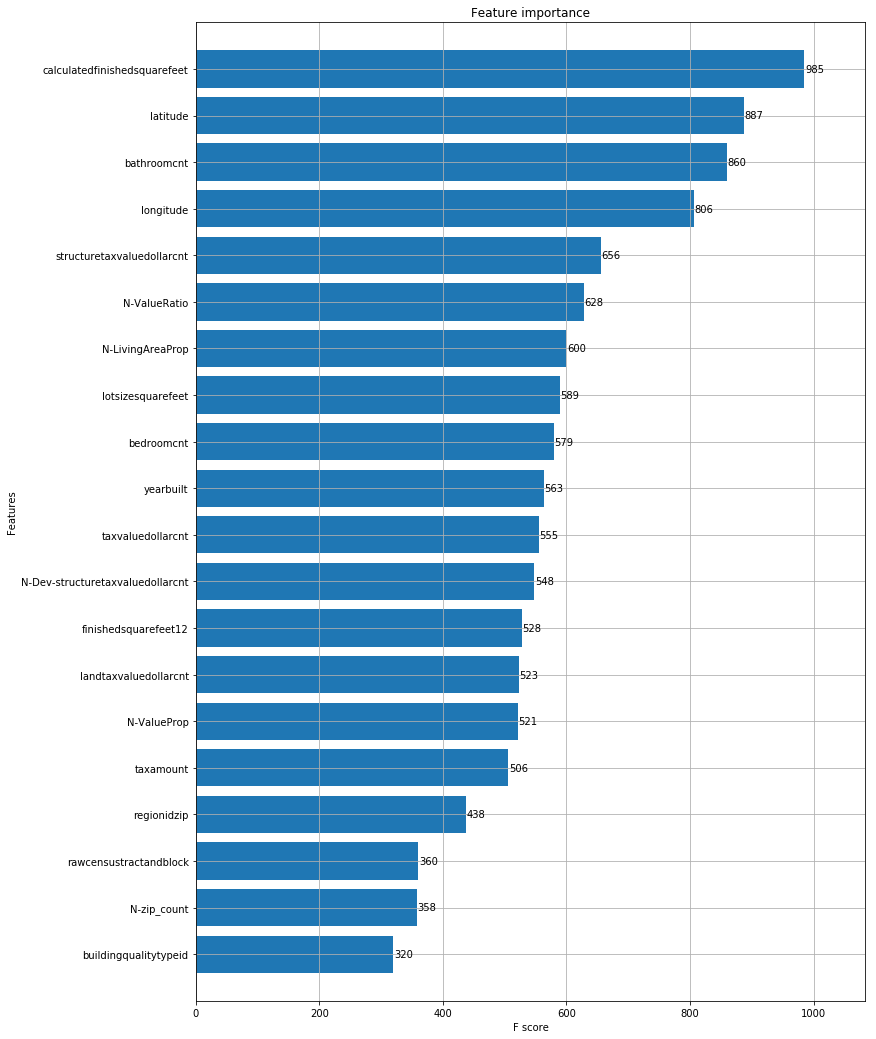

In [72]:
import xgboost as xgb

n_features = 20

# for c in prop_data.columns:
#     if prop_data[c].dtype == 'object':
#         lbl = LabelEncoder()
#         lbl.fit(list(prop_data[c].values))
#         prop_data_new[c] = lbl.transform(list(prop_data[c].values))

train_data = pd.read_csv("./train_2016_v2.csv")
sample = pd.read_csv("./sample_submission.csv")
sample['parcelid'] = sample['ParcelId']

train_data = train_data.merge(prop_data, on='parcelid', how='left')

y_train = train_data['logerror'].values
X_train = train_data.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
feat_names = X_train.columns.values
X_test = pd.merge(sample, prop_data, on='parcelid', how='left')
X_test = X_test[X_train.columns]

print "X train cols\n", X_train.columns.values
print "X_test shape"
print X_test.shape


xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

thresholds = model.get_fscore()
L = [(k,v) for (k,v) in thresholds.iteritems()]
thresholds = sorted(L, key=lambda x: x[1] , reverse=True)[:n_features]
thresholds = dict(thresholds)

X_train_new = X_train.drop([k for k in feat_names if k not in thresholds], axis=1)
# X_train, X_test, y_train, y_test = train_test_split( X_train, train_y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train_new, y_train, feature_names=X_train_new.columns.values)
X_test = xgb.DMatrix(X_test[X_train_new.columns])
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)
    
y_pred = model.predict(X_test)

for date in test_months:
    sample[date] = y_pred

sample["ParcelId"] = sample["parcelid"]
sample.drop(["parcelid"], axis=1, inplace=True)

print( "\nWriting results to disk ..." )
sample.to_csv('XGB_sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print( "\nFinished ...")

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()
                

X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

print "X train cols\n", X_train.columns.values
print "X_test shape"
print X_test.shape

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)

thresholds = model.get_fscore()
L = [(k,v) for (k,v) in thresholds.iteritems()]
thresholds = sorted(L, key=lambda x: x[1] , reverse=True)[:n_features]
thresholds = dict(thresholds)

X_train_new = X_train.drop([k for k in X_train.columns.values if k not in thresholds], axis=1)

dtrain = xgb.DMatrix(X_train_new, y_train, feature_names=X_train_new.columns.values)
X_test = xgb.DMatrix(X_test[X_train_new.columns])
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=150)
    

y_pred = model.predict(X_test)


print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))


# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [73]:
not_to_drop = ['parcelid', 'logerror', 'transactiondate']
X_train = train_data.drop([k for k in train_data.columns.values if k not in thresholds.keys() + not_to_drop], axis=1)
print X_train.columns.values
X_train.to_csv("./important_features.csv", index=False)

del train_data
del sample
del X_train
del X_train_new
del y_train
del X_test
gc.collect()

['parcelid' 'logerror' 'transactiondate' 'bathroomcnt' 'bedroomcnt'
 'buildingqualitytypeid' 'calculatedfinishedsquarefeet'
 'finishedsquarefeet12' 'latitude' 'longitude' 'lotsizesquarefeet'
 'rawcensustractandblock' 'regionidzip' 'yearbuilt'
 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt' 'landtaxvaluedollarcnt'
 'taxamount' 'N-LivingAreaProp' 'N-ValueProp' 'N-ValueRatio'
 'N-Dev-structuretaxvaluedollarcnt' 'N-zip_count']


10122

## Ridge Regression

In [74]:
train_data = pd.read_csv("./important_features.csv")

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# cat_cols = ["airconditioningtypeid", "heatingorsystemtypeid", "propertylandusetypeid"]
y_train = train_data["logerror"].values
X_train = train_data.drop(["parcelid", "logerror", "transactiondate"], axis=1)

print "X train cols\n", X_train.columns.values

X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.2, random_state=42)
# scorer = make_scorer(mean_sbsolute_error, greater_is_better=False)
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], normalize=True, gcv_mode='auto')
reg.fit( X_train, y_train)       
y_pred = reg.predict(X_test)


print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))

print reg.alpha_
print reg.coef_
print reg.intercept_

X train cols
['bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'latitude'
 'longitude' 'lotsizesquarefeet' 'rawcensustractandblock' 'regionidzip'
 'yearbuilt' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
 'landtaxvaluedollarcnt' 'taxamount' 'N-LivingAreaProp' 'N-ValueProp'
 'N-ValueRatio' 'N-Dev-structuretaxvaluedollarcnt' 'N-zip_count']
Mean absolute error:  0.068585
Mean squared error: 0.025987
0.1
[  2.94636362e-04   1.02627631e-03   1.64489293e-04   5.27870862e-06
   3.23095102e-06   1.70308693e-09  -1.89305874e-10   6.37078956e-09
   3.61526709e-09  -3.96966546e-07   4.58525031e-05  -8.57474985e-09
   2.22143610e-09   1.62414931e-09  -1.20440834e-06  -4.22083897e-03
  -2.68488034e-06   8.27043489e-05   5.44702347e-03  -8.63441806e-08]
-0.358955183639


## Lasso Regression

In [75]:
X_train = train_data.drop(["parcelid", "logerror", "transactiondate"], axis=1)

X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

print "X train cols\n", X_train.columns.values

# scorer = make_scorer(mean_sbsolute_error, greater_is_better=False)
reg = linear_model.LassoCV(normalize=True, precompute='auto', n_jobs=-1, random_state=7,
                           selection='random')
reg.fit( X_train, y_train)       

y_pred = reg.predict(X_test)

print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))


print reg.alpha_
print reg.coef_
print reg.intercept_


ValueError: Found input variables with inconsistent numbers of samples: [90275, 72220]

## MLPRegressor

In [76]:
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_train = train_data.drop(["parcelid", "logerror", "transactiondate"], axis=1)

print "X train cols\n", X_train.columns.values

X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

sc = StandardScaler(with_mean=True, with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=5, svd_solver='auto')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print pca.explained_variance_

# reg = MLPRegressor(hidden_layer_sizes=(50, 50), solver='sgd', learning_rate='adaptive', tol=1e-6, max_iter=10000, warm_start=True, verbose=True, early_stopping=True, validation_fraction=0.3)
reg = MLPRegressor(hidden_layer_sizes=(160, 64, 28), tol=1e-6, max_iter=10000, warm_start=True, verbose=True)#, early_stopping=True, validation_fraction=0.3)

for i in range(100):
    reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))



X train cols
['bathroomcnt' 'bedroomcnt' 'buildingqualitytypeid'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'latitude'
 'longitude' 'lotsizesquarefeet' 'rawcensustractandblock' 'regionidzip'
 'yearbuilt' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
 'landtaxvaluedollarcnt' 'taxamount' 'N-LivingAreaProp' 'N-ValueProp'
 'N-ValueRatio' 'N-Dev-structuretaxvaluedollarcnt' 'N-zip_count']


ValueError: Found input variables with inconsistent numbers of samples: [90275, 72220]

In [77]:
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer


print( "\n\nProcessing data for Neural Network ...")
print('\nLoading train, prop and sample data...')
train_data = pd.read_csv("./train_2016_v2.csv", parse_dates=["transactiondate"])
# prop = pd.read_csv('../input/properties_2016.csv')

prop = prop_data#pd.read_csv("./train_data_clean_2.csv")
sample = pd.read_csv('./sample_submission.csv')

print('Fitting Label Encoder on properties...')
for c in prop.columns:
    prop[c]=prop[c].fillna(-1)
    if prop[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(prop[c].values))
        prop[c] = lbl.transform(list(prop[c].values))

print('Creating training set...')
df_train = train_data.merge(prop, how='left', on='parcelid')

df_train["transactiondate"] = pd.to_datetime(df_train["transactiondate"])
df_train["transactiondate_year"] = df_train["transactiondate"].dt.year
df_train["transactiondate_month"] = df_train["transactiondate"].dt.month
df_train['transactiondate_quarter'] = df_train['transactiondate'].dt.quarter
df_train["transactiondate"] = df_train["transactiondate"].dt.day

# print('Creating x_train and y_train from df_train...' )
x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = df_train["logerror"]

train_columns = x_train.columns
print train_columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

print('Creating df_test...')
sample['parcelid'] = sample['ParcelId']
test_months = [k for k in sample.columns.values if k not in ["parcelid"]]

print("Merging Sample with property data...")
df_test = sample.merge(prop, on='parcelid', how='left')

# ## Preprocessing
print("\nPreprocessing neural network data...")
# imputer= Imputer()
# imputer.fit(x_train.iloc[:, :])
# x_train = imputer.transform(x_train.iloc[:, :])
# imputer.fit(x_test.iloc[:, :])
# x_test = imputer.transform(x_test.iloc[:, :])

# x_test.fillna(x_test.mean(), inplace=True)

df_test["transactiondate"] = pd.to_datetime('2016-11-15')  # placeholder value for preliminary version
df_test["transactiondate_year"] = df_test["transactiondate"].dt.year
df_test["transactiondate_month"] = df_test["transactiondate"].dt.month
df_test['transactiondate_quarter'] = df_test['transactiondate'].dt.quarter
df_test["transactiondate"] = df_test["transactiondate"].dt.day     
x_test = df_test[train_columns]

print('Shape of x_test:', x_test.shape)
print("Preparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)

len_x=int(x_train.shape[1])
print("len_x is:",len_x)


# Neural Network
print("\nSetting up neural network model...")
nn = Sequential()
nn.add(Dense(units = 400 , kernel_initializer = 'normal', input_dim = len_x))
nn.add(PReLU())
nn.add(Dropout(.4))
nn.add(Dense(units = 160 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.63))
nn.add(Dense(units = 64 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.45))
nn.add(Dense(units = 28, kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.5))
nn.add(Dense(1, kernel_initializer='normal'))
nn.compile(loss='mae', optimizer=Adam(lr=4e-3, decay=1e-4))

print("\nFitting neural network model...")
nn.fit(np.array(x_train), np.array(y_train), batch_size = 32, epochs = 70, verbose=2)

test_dates = ['2016-10-01','2016-11-01','2016-12-01','2017-10-01','2017-11-01','2017-12-01']
test_columns = ['201610','201611','201612','201710','201711','201712']
nn_pred = {}

for i in range(len(test_columns)):

    df_test["transactiondate"] = pd.to_datetime(test_dates[i])
    df_test["transactiondate_year"] = df_test["transactiondate"].dt.year
    df_test["transactiondate_month"] = df_test["transactiondate"].dt.month
    df_test['transactiondate_quarter'] = df_test['transactiondate'].dt.quarter
    df_test["transactiondate"] = df_test["transactiondate"].dt.day     
    x_test = df_test[train_columns]

    print('Shape of x_test:', x_test.shape)
    print("Preparing x_test...")
    for c in x_test.dtypes[x_test.dtypes == object].index.values:
        x_test[c] = (x_test[c] == True)

    x_test = sc.transform(x_test)
    print("\nPredicting with neural network model...")
    #print("x_test.shape:",x_test.shape)
    y_pred_ann = nn.predict(x_test)

    print( "\nPreparing results for write..." )
    nn_pred[test_columns[i]] = y_pred_ann.flatten()
    
    print( "Type of nn_pred is ", type(nn_pred[test_columns[i]]) )
    print( "Shape of nn_pred is ", nn_pred[test_columns[i]].shape )

    print( "\nNeural Network predictions:" )
    print( pd.DataFrame(nn_pred[test_columns[i]]).head() )

from datetime import datetime

for date in test_columns:
    sample[date] = nn_pred[date]

sample["ParcelId"] = sample["parcelid"]
sample.drop(["parcelid"], axis=1, inplace=True)

print( "\nWriting results to disk ..." )
sample.to_csv('NN_sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print( "\nFinished ...")


x_train, x_test, y_train, y_test = train_test_split( x_train, y_train, test_size=0.3, random_state=42)

# Neural Network
print("\nSetting up neural network model...")
nn = Sequential()
nn.add(Dense(units = 400 , kernel_initializer = 'normal', input_dim = len_x))
nn.add(PReLU())
nn.add(Dropout(.4))
nn.add(Dense(units = 160 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.63))
nn.add(Dense(units = 64 , kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.45))
nn.add(Dense(units = 28, kernel_initializer = 'normal'))
nn.add(PReLU())
nn.add(BatchNormalization())
nn.add(Dropout(.5))
nn.add(Dense(1, kernel_initializer='normal'))
nn.compile(loss='mae', optimizer=Adam(lr=4e-3, decay=1e-4))

print("\nFitting neural network model...")
nn.fit(np.array(x_train), np.array(y_train), batch_size = 32, epochs = 70, verbose=2)


print("\nPredicting with neural network model...")
#print("x_test.shape:",x_test.shape)
y_pred_ann = nn.predict(x_test)

print( "\nPreparing results for write..." )
nn_pred = y_pred_ann.flatten()
print( "Type of nn_pred is ", type(nn_pred) )
print( "Shape of nn_pred is ", nn_pred.shape )

print( "\nNeural Network predictions:" )
print( pd.DataFrame(nn_pred).head() )

print("Mean absolute error: % f" % mean_absolute_error(y_test, nn_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, nn_pred))


# Cleanup
del train_data
del prop
# del sample
# del x_train
# del x_test
del df_train
# del df_test
del y_pred_ann
gc.collect()


Using TensorFlow backend.




Processing data for Neural Network ...

Loading train, prop and sample data...
Fitting Label Encoder on properties...
Creating training set...
Index([u'airconditioningtypeid', u'bathroomcnt', u'bedroomcnt',
       u'buildingqualitytypeid', u'calculatedfinishedsquarefeet',
       u'finishedsquarefeet12', u'fips', u'garagecarcnt', u'garagetotalsqft',
       u'heatingorsystemtypeid', u'latitude', u'longitude',
       u'lotsizesquarefeet', u'propertylandusetypeid',
       u'rawcensustractandblock', u'regionidcity', u'regionidcounty',
       u'regionidzip', u'roomcnt', u'unitcnt', u'yearbuilt',
       u'structuretaxvaluedollarcnt', u'taxvaluedollarcnt',
       u'landtaxvaluedollarcnt', u'taxamount', u'age', u'N-LivingAreaProp',
       u'N-ValueProp', u'N-ValueRatio', u'N-Avg-structuretaxvaluedollarcnt',
       u'N-Dev-structuretaxvaluedollarcnt', u'N-zip_count', u'N-city_count',
       u'N-county_count', u'transactiondate_year', u'transactiondate_month',
       u'transactiondate_quarter']

76

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split( x_train, y_train, test_size=0.2, random_state=7)

neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform', n_jobs=-1)
neigh.fit(x_train, y_train) 

y_pred = neigh.predict(x_test)

print("Mean absolute error: % f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))
# from datetime import datetime

# for date in test_months:
#     sample[date] = nn_pred

# sample["ParcelId"] = sample["parcelid"]
# sample.drop(["parcelid"], axis=1, inplace=True)


# print( "\nWriting results to disk ..." )
# sample.to_csv('k_NN_sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

# print( "\nFinished ...")